**Stock Price Prediction And Forecasting Using Stacked LSTM**

In [ ]:
import pandas as pd
df= pd.read_csv('Training.csv')

In [ ]:
df.isnull().any()

,0
Date,False
Open,False
High,False
Low,False
Close,False
Shares Traded,False
Turnover,False


In [ ]:
df.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover
0,02-JAN-2023,18131.70,18215.15,18086.50,18197.45,256073979,11793.06
1,03-JAN-2023,18163.20,18251.95,18149.80,18232.55,208699772,13680.91
2,04-JAN-2023,18230.65,18243.00,18020.60,18042.95,235162202,16687.71
3,05-JAN-2023,18101.95,18120.30,17892.60,17992.15,269949738,22108.53
4,06-JAN-2023,18008.05,18047.40,17795.55,17859.45,238220578,17495.25


In [ ]:
df.tail()

,Date,Open,High,Low,Close,Shares Traded,Turnover
241,22-DEC-2023,21295.85,21390.50,21232.45,21349.40,284708918,27709.29
242,26-DEC-2023,21365.20,21477.15,21329.45,21441.35,219467748,20081.33
243,27-DEC-2023,21497.65,21675.75,21495.80,21654.75,256542963,23059.25
244,28-DEC-2023,21715.00,21801.45,21678.00,21778.70,393080755,35031.00
245,29-DEC-2023,21737.65,21770.30,21676.90,21731.40,270922276,23697.88


In [ ]:
print(df.columns)

df.columns = df.columns.str.strip()
print(df.columns)

Index(['Date ', 'Open ', 'High ', 'Low ', 'Close ', 'Shares Traded ',
       'Turnover'],
      dtype='object')
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Shares Traded', 'Turnover'], dtype='object')


In [ ]:
df1= df.reset_index()['Close']

In [ ]:
df1

,Close
0,18197.45
1,18232.55
2,18042.95
3,17992.15
4,17859.45
...,...
241,21349.40
242,21441.35
243,21654.75
244,21778.70


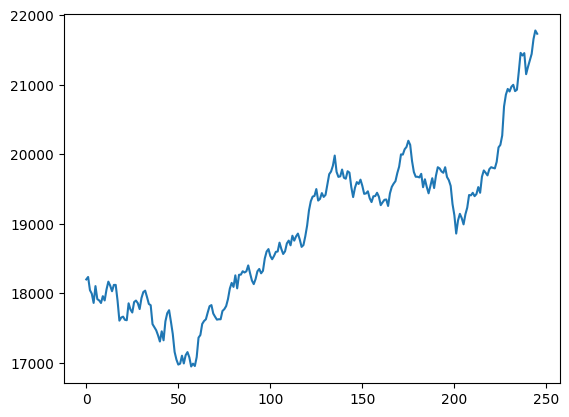

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [ ]:
import numpy as np

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler(feature_range=(0,1))
df1= scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
df1

array([[0.25910027],
       [0.26636186],
       [0.22713684],
       [0.21662719],
       [0.18917381],
       [0.23918778],
       [0.20049031],
       [0.19667332],
       [0.18891521],
       [0.2092725 ],
       [0.19649747],
       [0.22927808],
       [0.25245932],
       [0.24056355],
       [0.22397153],
       [0.2427772 ],
       [0.24272548],
       [0.19589751],
       [0.13639796],
       [0.14562494],
       [0.1483558 ],
       [0.13887021],
       [0.1376496 ],
       [0.18805664],
       [0.16955096],
       [0.1606343 ],
       [0.19170813],
       [0.19620783],
       [0.18856351],
       [0.17085432],
       [0.20373838],
       [0.22153031],
       [0.22566797],
       [0.20670715],
       [0.1861016 ],
       [0.18239839],
       [0.12604347],
       [0.11713715],
       [0.10773432],
       [0.09261117],
       [0.07425031],
       [0.10465176],
       [0.07796386],
       [0.13432913],
       [0.15855513],
       [0.16744075],
       [0.13334644],
       [0.096

In [ ]:
training_size = int(len(df1)*0.82)
val_size = len(df1)-training_size
train_data, val_data = df1[0:training_size,:], df1[training_size:len(df1),:1]

In [ ]:
training_size, val_size

(201, 45)

In [ ]:
train_data

array([[0.25910027],
       [0.26636186],
       [0.22713684],
       [0.21662719],
       [0.18917381],
       [0.23918778],
       [0.20049031],
       [0.19667332],
       [0.18891521],
       [0.2092725 ],
       [0.19649747],
       [0.22927808],
       [0.25245932],
       [0.24056355],
       [0.22397153],
       [0.2427772 ],
       [0.24272548],
       [0.19589751],
       [0.13639796],
       [0.14562494],
       [0.1483558 ],
       [0.13887021],
       [0.1376496 ],
       [0.18805664],
       [0.16955096],
       [0.1606343 ],
       [0.19170813],
       [0.19620783],
       [0.18856351],
       [0.17085432],
       [0.20373838],
       [0.22153031],
       [0.22566797],
       [0.20670715],
       [0.1861016 ],
       [0.18239839],
       [0.12604347],
       [0.11713715],
       [0.10773432],
       [0.09261117],
       [0.07425031],
       [0.10465176],
       [0.07796386],
       [0.13432913],
       [0.15855513],
       [0.16744075],
       [0.13334644],
       [0.096

In [ ]:
val_data

array([[0.39560167],
       [0.43490944],
       [0.45428403],
       [0.4416021 ],
       [0.42288953],
       [0.45270137],
       [0.47284143],
       [0.51031829],
       [0.50927353],
       [0.51688682],
       [0.50691506],
       [0.5131319 ],
       [0.53386157],
       [0.51689717],
       [0.56487334],
       [0.58344108],
       [0.57653119],
       [0.56871102],
       [0.58720636],
       [0.59309218],
       [0.59105438],
       [0.58954413],
       [0.60919802],
       [0.65200211],
       [0.65956368],
       [0.68744117],
       [0.77410446],
       [0.80892286],
       [0.8260114 ],
       [0.81844983],
       [0.83256959],
       [0.83830025],
       [0.81953596],
       [0.82366328],
       [0.87669773],
       [0.93337333],
       [0.92551178],
       [0.9326389 ],
       [0.86996369],
       [0.89166572],
       [0.91118513],
       [0.93020802],
       [0.97435685],
       [1.        ],
       [0.99021443]])

In [ ]:
import numpy
def create_dataset(dataset, time_step=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-time_step-1):
    a= dataset[i:(i+time_step), 0]
    dataX.append(a)
    dataY.append(dataset[i+time_step, 0])
  return numpy.array(dataX), numpy.array(dataY)

In [ ]:
def create_dataset(dataset, time_step):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    if len(dataX) == 0 or len(dataY) == 0:
        return np.empty((0, time_step)), np.empty((0,))
    return np.array(dataX), np.array(dataY)

In [ ]:
time_step = 10
X_train, y_train = create_dataset(train_data, time_step)
X_val, y_val = create_dataset(val_data, time_step)

In [ ]:
from re import X
print(X_train.shape), print(y_train.shape)

(190, 10)
(190,)


(None, None)

In [ ]:
print(X_val.shape)

(34, 10)


In [ ]:
x_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

In [ ]:
print(x_train.shape)
print(y_train.shape)

(190, 10, 1)
(190,)


In [ ]:
x_val = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model= Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(10,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 10, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 10, 50)              │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=15,batch_size=64,verbose=1)

Epoch 1/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 306ms/step - loss: 0.1403 - val_loss: 0.3578
Epoch 2/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0774 - val_loss: 0.1550
Epoch 3/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0230 - val_loss: 0.0113
Epoch 4/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0209 - val_loss: 0.0036
Epoch 5/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0211 - val_loss: 0.0283
Epoch 6/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0096 - val_loss: 0.0752
Epoch 7/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.0121 - val_loss: 0.0901
Epoch 8/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.0143 - val_loss: 0.0691
Epoch 9/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.0098 - val_loss: 0.0335
Epoch 10/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.0066 - val_loss: 0.0118
Epoch 11/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.0072 - val_loss: 0.0079
Epoch 12/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.0065 - val_loss: 0.0145


In [ ]:
import tensorflow as tf

In [ ]:
train_predict=model.predict(X_train)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step


In [ ]:
val_predict=model.predict(X_val)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


In [ ]:
train_predict=scaler.inverse_transform(train_predict)
val_predict=scaler.inverse_transform(val_predict)

In [ ]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

18614.70581509446

In [ ]:
math.sqrt(mean_squared_error(y_val,val_predict))

19955.348573847845

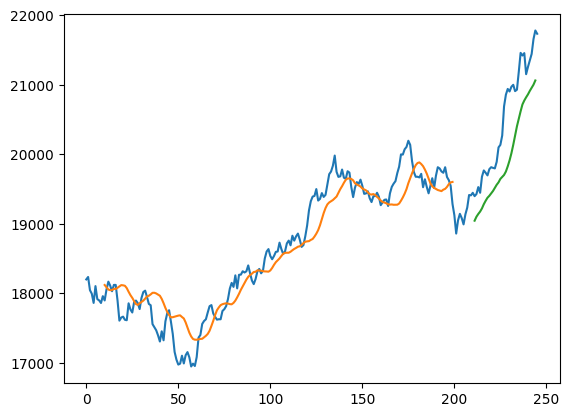

In [ ]:
look_back=10
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
valPredictPlot = numpy.empty_like(df1)
valPredictPlot[:, :] = numpy.nan
valPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = val_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(valPredictPlot)
plt.show()

 **Checking LSTM**

In [ ]:
data = pd.read_csv('Training.csv')
data.columns = data.columns.str.strip()

# Check data structure
data = pd.DataFrame(data[['Date','Open', 'Close', 'Turnover']])
data.head()

,Date,Open,Close,Turnover
0,02-JAN-2023,18131.70,18197.45,11793.06
1,03-JAN-2023,18163.20,18232.55,13680.91
2,04-JAN-2023,18230.65,18042.95,16687.71
3,05-JAN-2023,18101.95,17992.15,22108.53
4,06-JAN-2023,18008.05,17859.45,17495.25


In [ ]:
# Scaling data
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data[['Open', 'Close', 'Turnover']])

In [ ]:
test = pd.read_csv('Testing.csv')
test.columns = test.columns.str.strip()

test = pd.DataFrame(test[['Date','Open', 'Close', 'Turnover']])
test = scaler.fit_transform(test[['Open', 'Close', 'Turnover']])

In [ ]:
test_data = test
train_data = data
train_data.shape

(246, 3)

In [ ]:
# Set sequence length
sequence_length = 15

def create_sequences(data, seq_length):
    X, y = [], []
    data = pd.DataFrame(data, columns=['Open', 'Close', 'Turnover'])
    for i in range(len(data) - seq_length -1): # Change: Subtract 1 to stay within bounds
        X.append(data.iloc[i:i+seq_length][['Open', 'Close', 'Turnover']].values)
        y.append(data.iloc[i + seq_length][['Open', 'Close', 'Turnover']])  # Change: Use iloc to access by row index for clarity
    return np.array(X), np.array(y)

# Prepare sequences for training and testing
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)


In [ ]:
X_train.shape
y_train.shape

(230, 3)

In [ ]:
X_test.shape

(21, 15, 3)

In [ ]:
# Build the LSTM model

from tensorflow.keras.losses import Huber
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional

lstm_model = Sequential([
    LSTM(100, return_sequences=True, input_shape=(15, 3)),
    Dropout(0.2),
    LSTM(100, return_sequences=True),
    Dropout(0.2),
    LSTM(50),
    Dense(3)
])


# Compile the model
lstm_model.compile(optimizer=Adam(learning_rate=0.001,weight_decay=1e-5), loss=Huber())

# Train the model
lstm_history = lstm_model.fit(X_train, y_train, epochs=100, batch_size=8,validation_split=0.2)


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 48ms/step - loss: 0.0248 - val_loss: 0.0090
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0033 - val_loss: 0.0077
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0031 - val_loss: 0.0085
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0033 - val_loss: 0.0080
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0034 - val_loss: 0.0069
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0032 - val_loss: 0.0070
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0031 - val_loss: 0.0080
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0029 - val_loss: 0.0133
Epoch 9/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0030 - val_loss: 0.0090
Epoch 10/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0029 - val_loss: 0.0091
Epoch 11/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0033 - val_loss: 0.0123
Epoch 12/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0

In [ ]:
# Predict using both models
lstm_predictions = lstm_model.predict(X_test)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step


In [ ]:
# Inverse scale predictions
lstm_pred_rescaled = scaler.inverse_transform(lstm_predictions)
y_test_rescaled = scaler.inverse_transform(y_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


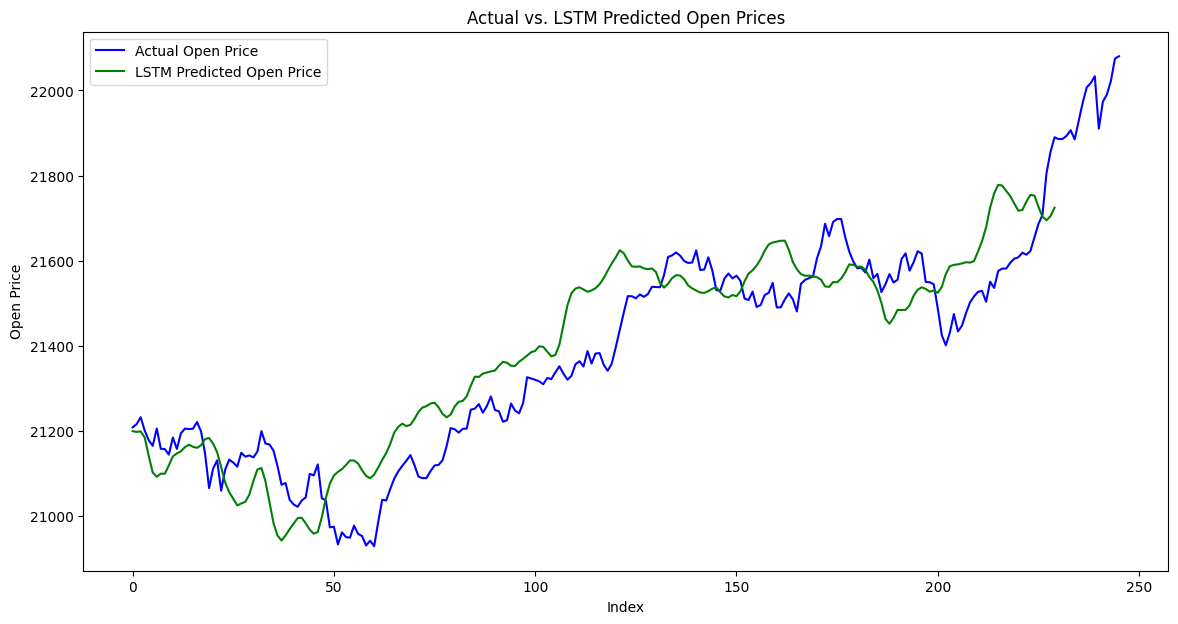

In [ ]:
train_predict = scaler.inverse_transform(lstm_model.predict(X_train))
plt.figure(figsize=(14, 7))
plt.plot(scaler.inverse_transform(data)[:, 0], color='blue', label='Actual Open Price')
plt.plot(train_predict[:, 0], color='green', label='LSTM Predicted Open Price')
plt.xlabel('Index')
plt.ylabel('Open Price')
plt.title('Actual vs. LSTM Predicted Open Prices')
plt.legend()
plt.show()

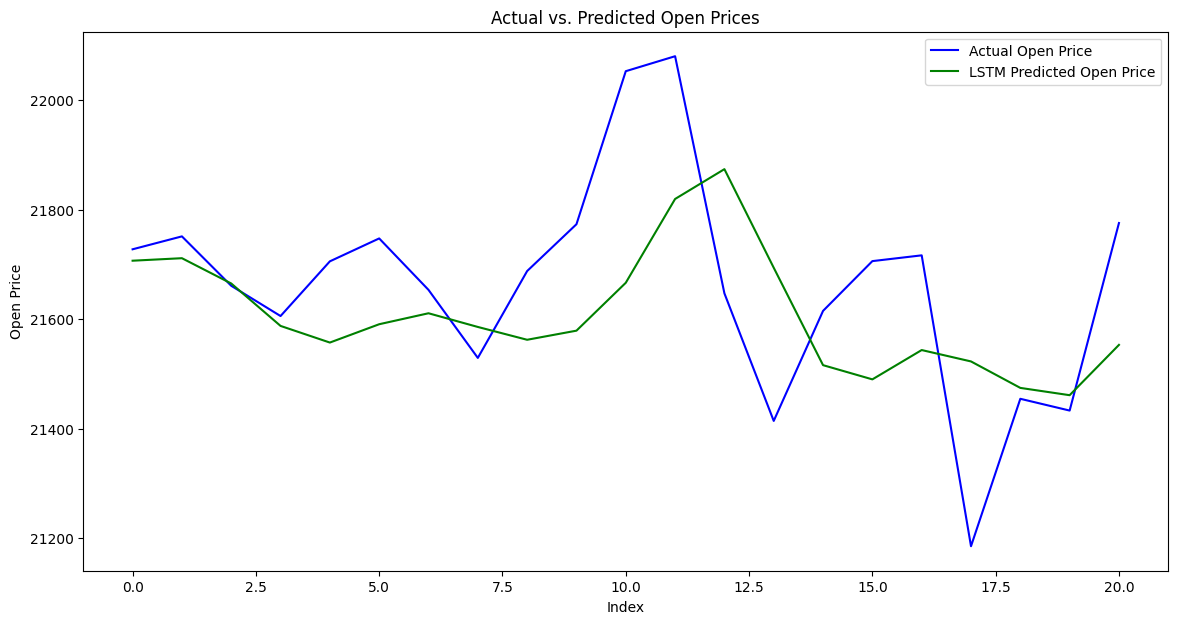

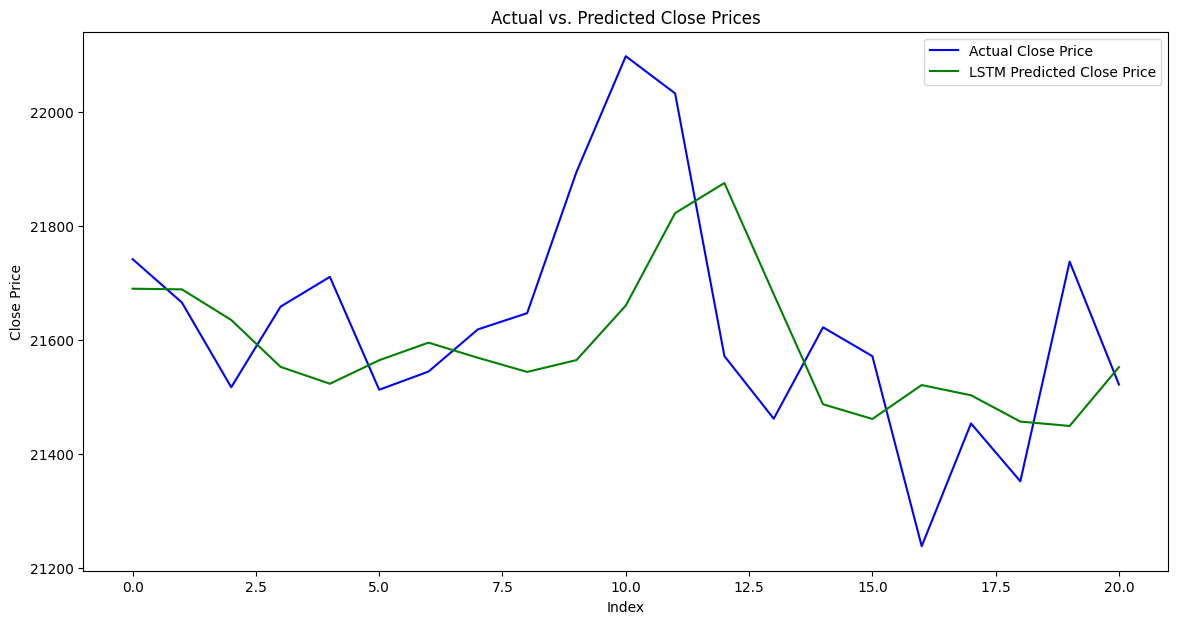

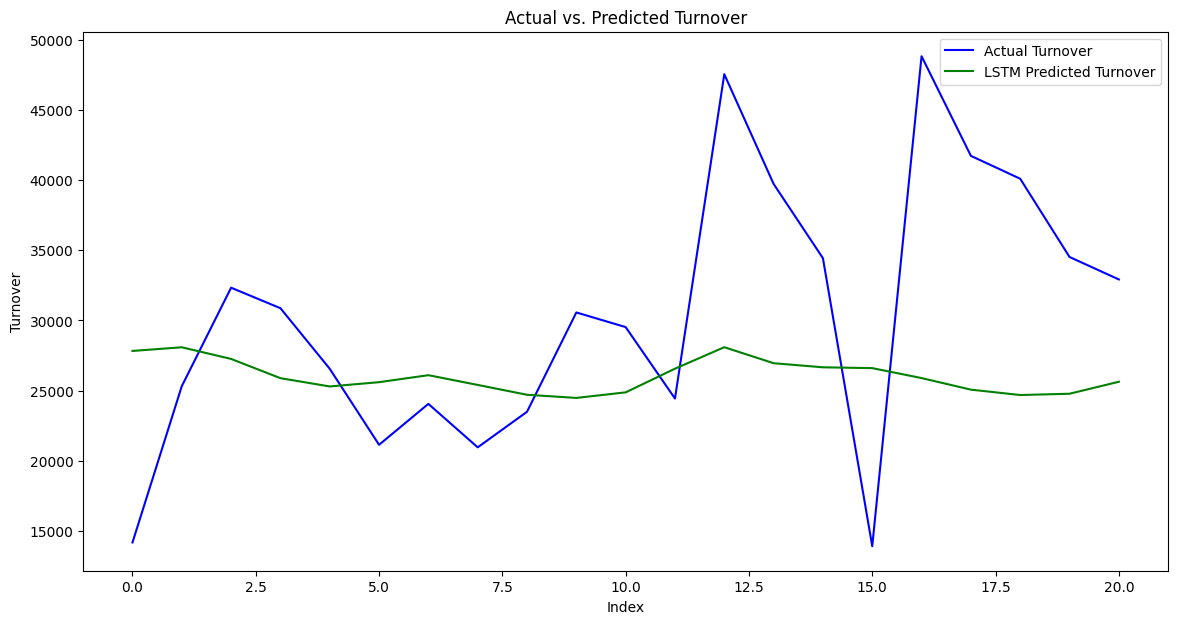

In [ ]:
import matplotlib.pyplot as plt

# Assume y_test_rescaled, rnn_pred_rescaled, and lstm_pred_rescaled are the actual values
# and the predictions from two models respectively

# Plot the actual and predicted Open prices
plt.figure(figsize=(14, 7))
plt.plot(y_test_rescaled[:, 0], color='blue', label='Actual Open Price')
plt.plot(lstm_pred_rescaled[:, 0], color='green', label='LSTM Predicted Open Price')
plt.xlabel('Index')
plt.ylabel('Open Price')
plt.title('Actual vs. Predicted Open Prices')
plt.legend()
plt.show()

# Plot the actual and predicted Close prices
plt.figure(figsize=(14, 7))
plt.plot(y_test_rescaled[:, 1], color='blue', label='Actual Close Price')
plt.plot(lstm_pred_rescaled[:, 1], color='green', label='LSTM Predicted Close Price')
plt.xlabel('Index')
plt.ylabel('Close Price')
plt.title('Actual vs. Predicted Close Prices')
plt.legend()
plt.show()

# Plot the actual and predicted Shares Traded
plt.figure(figsize=(14, 7))
plt.plot(y_test_rescaled[:, 2], color='blue', label='Actual Turnover')
plt.plot(lstm_pred_rescaled[:, 2], color='green', label='LSTM Predicted Turnover')
plt.xlabel('Index')
plt.ylabel('Turnover')
plt.title('Actual vs. Predicted Turnover')
plt.legend()
plt.show()


In [ ]:
np.savetxt("predicted.csv", y_test_rescaled, delimiter=",", header="Open,Close,Turnover", comments="", fmt="%.5f")

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

test = test[16:]

# Assuming y_test_rescaled is the actual values and Testing is the predicted values
# Both y_test_rescaled and Testing should have the same shape as numpy arrays

# Initialize lists to store error metrics for each column
r2_scores = []
mse = []
mae = []

# Calculate error metrics for each column
for i in range(y_test_rescaled.shape[1]):
    actual = y_test_rescaled[:, i]    # Extract actual values for the current column
    predicted = test[:, i]         # Extract predicted values for the current column

    # Calculate R² Score
    r2_col = r2_score(actual, predicted)
    r2_scores.append(r2_col)

    # Calculate Mean Squared Error (MSE)
    mse_col = mean_squared_error(actual, predicted)
    mse.append(mse_col)

    # Calculate Mean Absolute Error (MAE)
    mae_col = mean_absolute_error(actual, predicted)
    mae.append(mae_col)

# Print the error metrics for each column
print("R² Score for each column:", r2_scores)
print("Mean Squared Error (MSE) for each column:", mse)
print("Mean Absolute Error (MAE) for each column:", mae)


R² Score for each column: [-12505.54143979092, -11911.90617405531, -10.39460072399486]
Mean Squared Error (MSE) for each column: [469301355.7933018, 467758640.25579053, 1008839246.4282461]
Mean Absolute Error (MAE) for each column: [21662.498839783577, 21626.821467952446, 30336.508428164918]
